In [1]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#cross validation
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

In [2]:
#import the data
credit = pd.read_csv('CreditOneDataEDA.csv')

In [3]:
#check the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [4]:
#Need to get rid of the index
credit.to_csv('CreditModeling.csv', index=False)

In [5]:
#import data for machine learning and modeling
creditM=pd.read_csv('CreditModeling.csv')

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              30000 non-null  int64
 1   ID                                      30000 non-null  int64
 2   LIMIT_BAL                               30000 non-null  int64
 3   MARRIAGE                                30000 non-null  int64
 4   AGE                                     30000 non-null  int64
 5   PAY_0                                   30000 non-null  int64
 6   PAY_2                                   30000 non-null  int64
 7   PAY_3                                   30000 non-null  int64
 8   PAY_4                                   30000 non-null  int64
 9   PAY_5                                   30000 non-null  int64
 10  PAY_6                                   30000 non-null  int64
 11  BILL_AMT1      

In [7]:
# slicing, selecting features/range of columns not needed for baseline
# planning to use limit balance as the dependent variable
X = credit.iloc[:,[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
print('summary of feature sample')
X.head()

summary of feature sample


,ID,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,0,0,1,1
1,2,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,0,0,0,0,1,1
2,3,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,1,0,0,0,0,1,0
3,4,1,37,0,0,0,0,0,0,46990,...,1100,1069,1000,1,0,0,0,0,1,0
4,5,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,1,0,0,0,1,0


In [8]:
# dependent variable is limit balance
y = credit['LIMIT_BAL']

In [9]:
# check the dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 321)

In [11]:
# modeling with Random Forest Regressor
# limit balance as dependent
# baseline
RFR1 = RandomForestRegressor()
RFR_Model1 = RFR1.fit(X_train,y_train)

In [12]:
# prediction for the model above
RFR1_preds = RFR_Model1.predict(X_test)
print(r2_score(y_test, RFR1_preds))

0.47776632091478466


In [13]:
# modeling with Gradient Boosting Regressor
# limit balance as dependent
# baseline
GBR1 = GradientBoostingRegressor()
GBR_Model1 = GBR1.fit(X_train,y_train)
#prediction for the model
GBR1_preds = GBR_Model1.predict(X_test)
print(r2_score(y_test, GBR1_preds))

0.4776588137947244


In [14]:
# modeling with Linear Regression
# limit balance as dependent
# baseline
LR1 = LinearRegression()
LR_Model1 = LR1.fit(X_train,y_train)
#prediction for the model
LR1_preds = LR_Model1.predict(X_test)
print(r2_score(y_test, LR1_preds))

0.36416177395671046


In [15]:
# modeling with Support Vector Regression
# limit balance as dependent
# baseline
SVR1 = SVR()
SVR_Model1 = SVR1.fit(X_train,y_train)
#prediction for the model
SVR1_preds = SVR_Model1.predict(X_test)
print(r2_score(y_test, SVR1_preds))

-0.04422652934615634


In [16]:
# prepping regression algorithms
# compare these 4 regression algorithms
# this creates a copy and stores in the empty list
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algosClass.append(('Linear Regression', LinearRegression()))
algosClass.append(('Support Vector Regression', SVR()))

In [17]:
# regression scoring comparison, baseline
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=3, scoring='r2')
        names.append(name)
        results.append(result)

In [18]:
# cross validation scores, baseline
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4346715663892071
Gradient Boosting Regressor 0.47076807826054984
Linear Regression 0.35691056974250834
Support Vector Regression -0.05038885517356443


In [ ]:
# regression scoring comparison, baseline
# 5 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=5, scoring='r2')
        names.append(name)
        results.append(result)
# cross validation scores, baseline
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

In [ ]:
# regression scoring comparison, baseline
# 7 folds
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X,y, cv=7, scoring='r2')
        names.append(name)
        results.append(result)
# cross validation scores, baseline
# comparison of all 4
for i in range(len(names)):
    print(names[i],results[i].mean())

In [24]:
# predictions for Random Forest Regressor, baseline
RFRpredRsquared = r2_score(y_test, RFR1_preds)
RFRrmse = sqrt(mean_squared_error(y_test, RFR1_preds))
print('R Squared: %.3f' % RFRpredRsquared)
print('RMSE: %.3f' % RFRrmse)

R Squared: 0.478
RMSE: 93543.194


In [33]:
# predictions for Gradient Boosting Regressor, baseline
GBRpredRsquared = r2_score(y_test, GBR1_preds)
GBRrmse = sqrt(mean_squared_error(y_test, GBR1_preds))
print('R Squared: %.3f' % GBRpredRsquared)
print('RMSE: %.3f' % GBRrmse)

R Squared: 0.478
RMSE: 93552.822


In [35]:
# predictions for Support Vector Regression, baseline
SVRpredRsquared = r2_score(y_test, SVR1_preds)
SVRrmse = sqrt(mean_squared_error(y_test, SVR1_preds))
print('R Squared: %.3f' % SVRpredRsquared)
print('RMSE: %.3f' % SVRrmse)

R Squared: -0.044
RMSE: 132274.802


In [36]:
# predictions for Linear Regression, baseline
LRpredRsquared = r2_score(y_test, LR1_preds)
LRrmse = sqrt(mean_squared_error(y_test, LR1_preds))
print('R Squared: %.3f' % LRpredRsquared)
print('RMSE: %.3f' % LRrmse)

R Squared: 0.364
RMSE: 103217.438


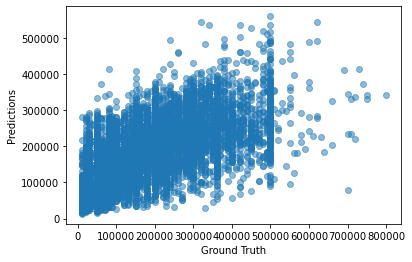

In [32]:
# plotting the results example
# stuck on how to fix the color issue
# c argument is wrong but not sure how to fix
plt.scatter(y_test, RFR1_preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();